In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [7]:
alexnet = Sequential()

In [18]:
alexnet = Sequential()

# add 96 convolution filters of size 11x11 with stride 4
alexnet.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(32, 32, 3)))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

alexnet.add(Conv2D(256, (5,5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# flatten the input feature map. here it flattens the last feature map before it
alexnet.add(Flatten())

# add FC layers. Using less no. of neurons here
alexnet.add(Dense(384, activation='relu'))
alexnet.add(Dense(384, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
alexnet.add(Dense(10, activation='softmax'))

In [10]:
alexnet.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 384)            │       147,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 384)            │       147,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,489,226 (17.13 MB)

 Trainable params: 4,489,226 (17.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.datasets import cifar10


In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 655s 4us/step


In [13]:
import numpy as np

X_train = np.array(X_train, dtype='float') / 255.0
X_test = np.array(X_test, dtype='float') / 255.0

In [14]:
from keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [19]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)
alexnet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [20]:
H = alexnet.fit(X_train, y_train_ohe, batch_size=128, epochs=50, verbose=2, validation_split=0.15)

Epoch 1/50
333/333 - 107s - 321ms/step - accuracy: 0.1509 - loss: 2.3012 - val_accuracy: 0.2380 - val_loss: 2.2991
Epoch 2/50
333/333 - 108s - 323ms/step - accuracy: 0.2038 - loss: 2.2951 - val_accuracy: 0.2045 - val_loss: 2.2881
Epoch 3/50
333/333 - 103s - 309ms/step - accuracy: 0.1854 - loss: 2.2619 - val_accuracy: 0.1821 - val_loss: 2.1969
Epoch 4/50
333/333 - 100s - 300ms/step - accuracy: 0.2120 - loss: 2.0813 - val_accuracy: 0.2439 - val_loss: 2.0286
Epoch 5/50
333/333 - 98s - 294ms/step - accuracy: 0.2493 - loss: 1.9822 - val_accuracy: 0.2448 - val_loss: 1.9731
Epoch 6/50
333/333 - 98s - 293ms/step - accuracy: 0.2695 - loss: 1.9160 - val_accuracy: 0.2867 - val_loss: 1.9066
Epoch 7/50
333/333 - 99s - 297ms/step - accuracy: 0.3094 - loss: 1.8222 - val_accuracy: 0.3317 - val_loss: 1.7728
Epoch 8/50
333/333 - 100s - 299ms/step - accuracy: 0.3435 - loss: 1.7508 - val_accuracy: 0.3463 - val_loss: 1.7517
Epoch 9/50
333/333 - 98s - 295ms/step - accuracy: 0.3711 - loss: 1.6914 - val_accur

In [22]:
alexnet.save_weights('alexnet_trained_cifar10.weights.h5')

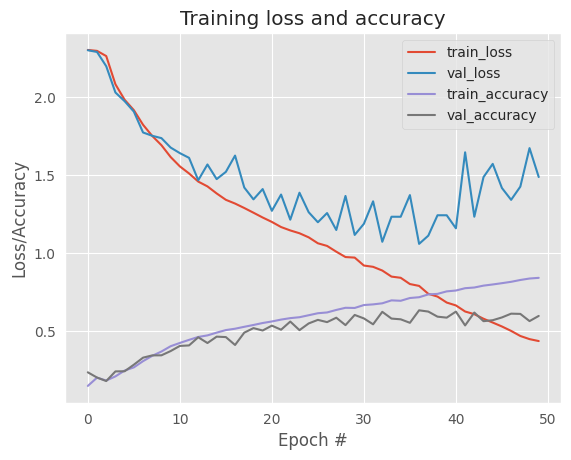

In [23]:
import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [24]:
alexnet.load_weights('alexnet_trained_cifar10.weights.h5')

In [25]:
score = alexnet.evaluate(X_test, y_test_ohe, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6022 - loss: 1.4600
Test Loss =  1.4670215845108032
Test Accuracy =  0.6021999716758728


In [31]:
'''CONFUSION MATRIX'''
# Making prediction
y_pred = alexnet.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


<Axes: >

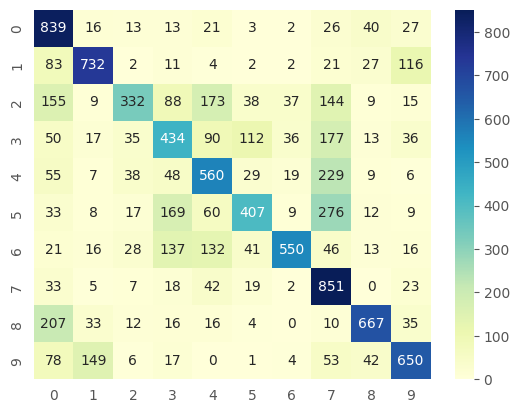

In [33]:
import seaborn as sns
sns.heatmap(confusion_mtx,
            annot=True, fmt='d', cmap="YlGnBu")